In [8]:
# var inspector (install in anaconda prompt):
#   conda install -c conda-forge jupyterlab-variableinspector

In [9]:
# %conda install tensorflow
# %conda install numpy
# %conda install pandas
# %conda install -c conda-forge matplotlib
# %conda install keras
# %conda install Pillow

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6687421868738959453]

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [94]:
INPUT_HEIGHT = 270
INPUT_WIDTH = 480
INPUT_CHANNEL = 3

In [95]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

inputs = tf.keras.layers.Input(shape=(INPUT_HEIGHT,INPUT_WIDTH, INPUT_CHANNEL))

x = layers.Conv2D(32, (5, 5), activation='relu', padding='same')(inputs)
x = layers.MaxPooling2D((5, 5), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((3, 3), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((3, 3))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding="same")(x)
x = layers.UpSampling2D((5, 5))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

model = tf.keras.Model(inputs, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()


# model = models.Sequential()
# # encoding
# model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(INPUT_HEIGHT, INPUT_WIDTH, 3), padding='same'))
# model.add(layers.MaxPooling2D((5, 5), padding='same'))
# model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(INPUT_HEIGHT, INPUT_WIDTH, 3), padding='same'))
# model.add(layers.MaxPooling2D((3, 3), padding='same'))
# model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(INPUT_HEIGHT, INPUT_WIDTH, 3), padding='same'))
# model.add(layers.MaxPooling2D((2, 2), padding='same'))
# # decoding
# model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(INPUT_HEIGHT, INPUT_WIDTH, 3), padding='same'))
# model.add(layers.UpSampling2D((2, 2)))
# model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(INPUT_HEIGHT, INPUT_WIDTH, 3), padding='same'))
# model.add(layers.UpSampling2D((3, 3)))
# model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(INPUT_HEIGHT, INPUT_WIDTH, 3), padding='same'))
# model.add(layers.UpSampling2D((5, 5)))

# model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 270, 480, 3)]     0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 270, 480, 32)      2432      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 54, 96, 32)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 54, 96, 8)         2312      
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 18, 32, 8)         0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 18, 32, 8)         584       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 9, 16, 8)          0   

In [102]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

img1 = load_img('data/stimuli.out/1.jpg', target_size=(INPUT_HEIGHT, INPUT_WIDTH))
img2 = load_img('data/stimuli.out/2.jpg', target_size=(INPUT_HEIGHT, INPUT_WIDTH))
images = np.asarray([img_to_array(img1)])
X = images / 255
# X = preprocess_input(images)

heat1 = load_img('data/heatmap/1_heatmap.png', color_mode='grayscale', target_size=(INPUT_HEIGHT, INPUT_WIDTH))
heat2 = load_img('data/heatmap/2_heatmap.png', color_mode='grayscale', target_size=(INPUT_HEIGHT, INPUT_WIDTH))
heats = np.asarray([img_to_array(heat1)])
y = heats / 256
# y = preprocess_input(heats)

In [103]:
y.shape

(1, 270, 480, 1)

In [110]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print(y.shape)
model.fit(X, y, batch_size=1, epochs=5)

(1, 270, 480, 1)
Epoch 1/5
1/1 [==============================] - 0s 318ms/step - loss: 0.0000e+00 - accuracy: 0.2765
Epoch 2/5
1/1 [==============================] - 0s 27ms/step - loss: 0.0000e+00 - accuracy: 0.2765
Epoch 3/5
1/1 [==============================] - 0s 21ms/step - loss: 0.0000e+00 - accuracy: 0.2765
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2765
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.2765


In [111]:
from tensorflow.keras.preprocessing.image import array_to_img
x_test = np.asarray([img_to_array(img2)]) / 255
pred_y = model.predict(x_test)

pred_img = array_to_img(pred_y[0])

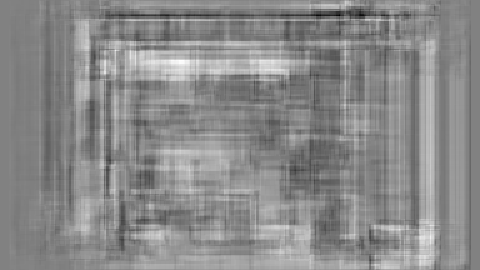

In [112]:
pred_img